##  Zadanie 1

In [1]:
import nltk

sentence = open("data/article.txt", "r")
tokens = nltk.word_tokenize(sentence.read(), language='english')
len(tokens)

1658

In [2]:
tagged = nltk.pos_tag(tokens)
tagged

[('There', 'EX'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('election', 'NN'),
 ('fever', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('ancient', 'JJ'),
 ('city', 'NN'),
 ('of', 'IN'),
 ('Antakya', 'NNP'),
 ('in', 'IN'),
 ('southern', 'JJ'),
 ('Turkey', 'NNP'),
 ('-', ':'),
 ('just', 'RB'),
 ('rubble', 'JJ'),
 ('and', 'CC'),
 ('torment', 'NN'),
 ('.', '.'),
 ('``', '``'),
 ('What', 'WP'),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('ballot', 'NN'),
 ('box', 'NN'),
 ('is', 'VBZ'),
 ('his', 'PRP$'),
 ('dead', 'JJ'),
 ('body', 'NN'),
 ('and', 'CC'),
 ('nothing', 'NN'),
 ('else', 'RB'),
 (',', ','),
 ("''", "''"),
 ('says', 'VBZ'),
 ('Fethiye', 'NNP'),
 ('Keklik', 'NNP'),
 ('.', '.'),
 ('``', '``'),
 ('Our', 'PRP$'),
 ('souls', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('ripped', 'VBN'),
 ('away', 'RB'),
 ('.', '.'),
 ('He', 'PRP'),
 ("'s", 'VBZ'),
 ('no', 'DT'),
 ('use', 'NN'),
 ('to', 'TO'),
 ('us', 'PRP'),
 ('.', '.'),
 ("''", "''"),
 ('The', 'DT'),
 ('68-year-old', 'JJ'),


In [3]:
stopwords = set(nltk.corpus.stopwords.words("english"))
filtered_words = [w for w in tokens if w.lower() not in stopwords]
len(filtered_words)

1027

In [4]:
additional = [".", ",", ":", ";", "'s", "``", "\''", "-"]
stopwords.update(additional)

filtered_words = [w for w in tokens if w.lower() not in stopwords]
len(filtered_words)

749

In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in filtered_words]
print(stemmed_words)
len(stemmed_words)

['elect', 'fever', 'ancient', 'citi', 'antakya', 'southern', 'turkey', 'rubbl', 'torment', 'want', 'ballot', 'box', 'dead', 'bodi', 'noth', 'els', 'say', 'fethiy', 'keklik', 'soul', 'rip', 'away', 'use', 'us', '68-year-old', 'grandmoth', 'refer', 'turkey', 'presid', 'recep', 'tayyip', 'erdogan', 'insult', 'presid', 'get', 'jail', 'wo', "n't", 'silenc', 'bring', 'harm', "'m", 'think', 'burn', 'ballot', 'paper', 'front', 'polic', 'soldier', 'turkey', 'islamist', 'leader', 'look', 'vulner', 'never', 'upcom', 'elect', 'parliament', 'presid', '14', 'may', 'end', 'authoritarian', 'erdogan', 'era', 'come', 'mean', 'freer', 'democrat', 'turkey', 'jail', 'may', 'less', 'crowd', 'relat', 'west', 'less', 'fraught', 'run-up', 'poll', 'turk', 'much', 'complain', 'griev', 'state', 'slow', 'respons', 'februari', 'earthquak', 'economi', 'ruin', 'offici', 'inflat', 'rate', '50', '%', 'real', 'figur', 'could', 'twice', 'expert', 'blame', 'presid', 'econom', 'polici', 'polit', 'describ', 'unorthodox', 's

749

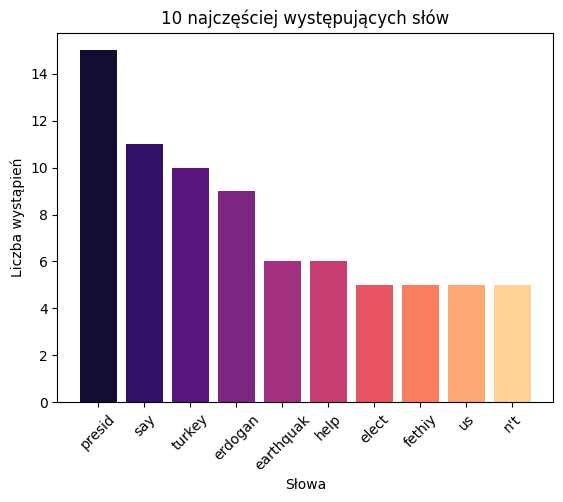

In [6]:
from nltk.probability import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt

word_freq = FreqDist(stemmed_words)

vector = {}
for w, freq in word_freq.items():
    vector[w] = freq

sorted_vector = sorted(vector.items(), key=lambda x: x[1], reverse=True)

top_10_words = sorted_vector[:10]
top_words, top_freqs = zip(*top_10_words)

plt.bar(top_words, top_freqs, color=sns.color_palette('magma', 10))
plt.xlabel("Słowa")
plt.ylabel("Liczba wystąpień")
plt.title("10 najczęściej występujących słów")
plt.xticks(rotation=45)
plt.show()

In [7]:
# pip install wordcloud

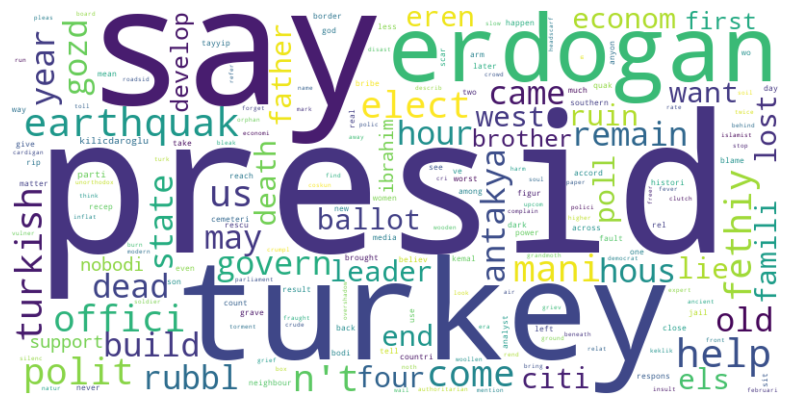

In [8]:
from wordcloud import WordCloud

text = ' '.join(stemmed_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Zadanie 2

In [9]:
positive = "I had such a great experience here!! PIL at the front desk was amazing and so accommodating… I have a service dog and they are pet friendly thank goodness and he made it SO comfortable for us. The room itself was super clean and cute and everything we needed for a perfect stay!! Thank you SO much to PIL and The Hollywood hotel - it was also a great deal!!"
negative = "The hotel looks absolutely nothing like the photos, dark, out dated and dingy the most. Quality of a motel!! The front desk are the least helpful or friendly I ever meet! Good thing, we only need one night. The experience is unpleasant, unsafe! Staff wear no mask while we’re still amidst pandemic. DO NOT stay here"

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

positive_sentiment = sia.polarity_scores(positive)
negative_sentiment = sia.polarity_scores(negative)

print("Pozytywna opinia:")
print(positive_sentiment)
print("\nNegatywna opinia:")
print(negative_sentiment)

Pozytywna opinia:
{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.9918}

Negatywna opinia:
{'neg': 0.171, 'neu': 0.735, 'pos': 0.093, 'compound': -0.6235}


In [11]:
#pip install text2emotion

In [12]:
# paczka Text2Emotion wyrzuca błąd :(

In [13]:
import text2emotion as te

positive_emotions = te.get_emotion(positive)
negative_emotions = te.get_emotion(negative)

print("Emocje w pozytywnej opinii:")
print(positive_emotions)
print("\nEmocje w negatywnej opinii:")
print(negative_emotions)

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Emocje w pozytywnej opinii:
{'Happy': 0.5, 'Angry': 0.1, 'Surprise': 0.1, 'Sad': 0.2, 'Fear': 0.1}

Emocje w negatywnej opinii:
{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.0, 'Sad': 0.44, 'Fear': 0.22}


In [63]:
# pip install NRCLex

In [82]:
from nrclex import NRCLex
positive_emotions = NRCLex(positive).affect_frequencies
negative_emotions = NRCLex(negative).affect_frequencies

print("Emocje w pozytywnej opinii:", positive_emotions)
print("\nEmocje w negatywnej opinii:", negative_emotions)

Emocje w pozytywnej opinii: {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.21739130434782608, 'surprise': 0.08695652173913043, 'positive': 0.2608695652173913, 'negative': 0.043478260869565216, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.21739130434782608, 'anticipation': 0.17391304347826086}

Emocje w negatywnej opinii: {'fear': 0.1111111111111111, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.16666666666666666, 'surprise': 0.0, 'positive': 0.1111111111111111, 'negative': 0.2222222222222222, 'sadness': 0.16666666666666666, 'disgust': 0.05555555555555555, 'joy': 0.1111111111111111, 'anticipation': 0.05555555555555555}


In [ ]:
# c) nltk dobrze oceniło, czy opinia jest pozytywna czy negatywna
# emocje nie do końca spełniają oczekawania, szczególnie wartość trust dla opinii negatywnej

In [84]:
positive2 = "Great price for the location, That`s why we chose the hotel. Daniel at the concierge welcomed us to the hotel and checked us in. Daniel was very professional and thorough. I love the soft sheets on the bed. There was no carpet on the floor which was nice. They have tiles instead. (no weird smells because they don`t use carpet). Would stay there again."
negative2 = "This hotel is way below standard and is nothing like the photos on the website. Our room was filthy with damage to all the mirrors, bathroom fittings, rust and dirty marks in the tiny old bathroom. Dingy and dirty very small bedroom again nothing like the photos show. It’s almost like the photos are from a different hotel, we had to double check we were in the correct hotel that had been booked in advance for us! We were initially booked in there for three nights but it was so bad we checked out the next morning at a cost to ourselves and checked in at a nice hotel. The area the hotel is situated in is dangerous to go out at night and not very pleasant during the day. There are drug addicts and drunks roaming around the streets all around the hotel. The next street had makeshift tents made from tarpaulins and wheelie bins and they were down many of the streets in that area. Very very disappointed."

positive_sentiment = sia.polarity_scores(positive2)
negative_sentiment = sia.polarity_scores(negative2)

print("Pozytywna opinia:")
print(positive_sentiment)
print("\nNegatywna opinia:")
print(negative_sentiment)
print()

positive_emotions = NRCLex(positive2).affect_frequencies
negative_emotions = NRCLex(negative2).affect_frequencies
print("Emocje w pozytywnej opinii:", positive_emotions)
print("\nEmocje w negatywnej opinii:", negative_emotions)

Pozytywna opinia:
{'neg': 0.052, 'neu': 0.766, 'pos': 0.181, 'compound': 0.891}

Negatywna opinia:
{'neg': 0.159, 'neu': 0.821, 'pos': 0.019, 'compound': -0.9765}

Emocje w pozytywnej opinii: {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.2, 'surprise': 0.0, 'positive': 0.4, 'negative': 0.1, 'sadness': 0.0, 'disgust': 0.1, 'joy': 0.2}

Emocje w negatywnej opinii: {'fear': 0.08571428571428572, 'anger': 0.08571428571428572, 'anticip': 0.0, 'trust': 0.05714285714285714, 'surprise': 0.05714285714285714, 'positive': 0.05714285714285714, 'negative': 0.2857142857142857, 'sadness': 0.08571428571428572, 'disgust': 0.17142857142857143, 'joy': 0.05714285714285714, 'anticipation': 0.05714285714285714}


## Zadanie 3

In [60]:
#pip install snscrape

In [79]:
import snscrape.modules.twitter as sntwitter

text = "otter"
tweet_limit = 100

query = f"text:{text} count:{tweet_limit}"

attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i>100:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])

tweets_df.to_csv('tweets.csv', index=False)

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=text%3Aotter+count%3A100&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2Ch

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=text%3Aotter+count%3A100&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [78]:
text = "otter"
location = "Gdańsk"
since_date = "2020-09-10"
until_date = "2020-10-10"
tweet_limit = 50

query = f"text:{text} near:{location} since:{since_date} until:{until_date} count:{tweet_limit}"

attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i>100:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])

tweets_df.to_csv('tweets.csv', index=False)

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=text%3Aotter+near%3AGda%C5%84sk+since%3A2020-09-10+until%3A2020-10-10+count%3A50&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_correc

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=text%3Aotter+near%3AGda%C5%84sk+since%3A2020-09-10+until%3A2020-10-10+count%3A50&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

## Zadanie 4

In [14]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
def create_LSTM(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape))
    model.add(Dense(units=dense_units, activation=activation))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

    # Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
    filename = 'plots/lstm_plot.png'
    plt.savefig(filename)
    plt.close()

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
 
# Create model and train
model = create_LSTM(hidden_units=5, dense_units=1, input_shape=(time_steps,1), 
                   activation='tanh')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
 
# Print error
print_error(trainY, testY, train_predict, test_predict)
 
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/20
187/187 - 5s - loss: 0.0106 - 5s/epoch - 25ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0052 - 1s/epoch - 5ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0044 - 1s/epoch - 7ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0043 - 743ms/epoch - 4ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0040 - 1s/epoch - 7ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0041 - 847ms/epoch - 5ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0040 - 1s/epoch - 7ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0039 - 929ms/epoch - 5ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0038 - 734ms/epoch - 4ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0039 - 718ms/epoch - 4ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0039 - 694ms/epoch - 4ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0039 - 740ms/epoch - 4ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0036 - 779ms/epoch - 4ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0037 - 787ms/epoch - 4ms/step
Epoch 15/20
187/187 - 1s - loss: 0.0038 - 745ms/epoch - 4ms/step
Epoch 16/20
187/187 - 1s - loss: 0.0038 - 1s/epo

In [5]:
# Small LSTM Network to Generate Text for Alice in Wonderland
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
# load ascii text and covert to lowercase
filename = "data/wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
print("Characters: ")
print(chars)
char_to_int = dict((c, i) for i, c in enumerate(chars))
print("CharacterToNumbers: ")
print(char_to_int)

# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
#filename = "weights-improvement-03-2.7711.hdf5"
#model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
#model.fit(X, y, epochs=50, batch_size=128, callbacks=callbacks_list)
model.fit(X, y, epochs=5, batch_size=128, callbacks=callbacks_list)

Characters: 
['\n', ' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ù', '—', '‘', '’', '“', '”', '\ufeff']
CharacterToNumbers: 
{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, "'": 7, '(': 8, ')': 9, '*': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '?': 27, '[': 28, ']': 29, '_': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56, 'ù': 57, '—': 58, '‘': 59, '’': 60, '“': 61, '”': 62, '\ufeff': 63}
Total Characters:  164016
Total Vocab:  64
Total Patterns:  163916

In [7]:
# Load LSTM network and generate text
import sys
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
# load ascii text and covert to lowercase
filename = "data/wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
# load the network weights
filename = "weights-improvement-05-2.6348.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(500):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nDone.")

Total Characters:  164016
Total Vocab:  64
Total Patterns:  163916
Seed:
" wonder if i shall fall right _through_
the earth! how funny it’ll seem to come out among the people  "
aar to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to the hare to t
Done.


In [9]:
# Small LSTM Network to Generate Text for Alice in Wonderland
import numpy as np
from nltk.tokenize import wordpunct_tokenize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
# load ascii text and covert to lowercase
filename = "data/wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers
tokenized_text = wordpunct_tokenize(raw_text)
tokens = sorted(list(dict.fromkeys(tokenized_text)))

#print("Tokens: ")
#print(tokens)
tok_to_int = dict((c, i) for i, c in enumerate(tokens))
#print("TokensToNumbers: ")
print(tok_to_int)

# summarize the loaded data
n_tokens = len(tokenized_text)
n_token_vocab = len(tokens)
print("Total Tokens: ", n_tokens)
print("Unique Tokens (Token Vocab): ", n_token_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_tokens - seq_length, 1):
    seq_in = tokenized_text[i:i + seq_length]
    seq_out = tokenized_text[i + seq_length]
    dataX.append([tok_to_int[tok] for tok in seq_in])
    dataY.append(tok_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_token_vocab)
# one hot encode the output variable
y = to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
#filename = "big-token-model-30-2.3772.hdf5"
#model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint
filepath="big-token-model-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
#model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)
model.fit(X, y, epochs=4, batch_size=128, callbacks=callbacks_list)

{'!': 0, '!)': 1, '!—': 2, '!’': 3, '!’?”': 4, '!’”': 5, '!”': 6, '!”)': 7, '"': 8, '"),': 9, '#': 10, '$': 11, '%': 12, "'": 13, "',": 14, '(': 15, '("': 16, '($': 17, '(“': 18, ')': 19, ')(': 20, '),': 21, ').': 22, '):': 23, ');': 24, ')—': 25, ')—“': 26, '*': 27, '***': 28, '*****': 29, ',': 30, ',"': 31, ',)': 32, ',’': 33, ',’”': 34, ',”': 35, '-': 36, '--': 37, '.': 38, '."': 39, '.)': 40, '.,': 41, '.]': 42, '.—': 43, '.—“': 44, '.’': 45, '.’”': 46, '.”': 47, '.”)': 48, '/': 49, '0': 50, '000': 51, '1': 52, '11': 53, '12': 54, '1500': 55, '1887': 56, '1991': 57, '2': 58, '20': 59, '2001': 60, '2020': 61, '3': 62, '30': 63, '4': 64, '5': 65, '50': 66, '501': 67, '596': 68, '6': 69, '60': 70, '6221541': 71, '64': 72, '7': 73, '8': 74, '801': 75, '809': 76, '84116': 77, '9': 78, '90': 79, ':': 80, '://': 81, ':—': 82, ';': 83, ';—': 84, ';”': 85, '?': 86, '?)': 87, '?—': 88, '?’”': 89, '?”': 90, '?”,': 91, '[': 92, ']': 93, '_': 94, '_alice': 95, '_all': 96, '_all_': 97, '_and': 9

Total Patterns:  37930
Epoch 1/4
297/297 [==============================] - ETA: 0s - loss: 6.1514
Epoch 1: loss improved from inf to 6.15143, saving model to big-token-model-01-6.1514.hdf5
297/297 [==============================] - 92s 304ms/step - loss: 6.1514
Epoch 2/4
297/297 [==============================] - ETA: 0s - loss: 5.9743
Epoch 2: loss improved from 6.15143 to 5.97426, saving model to big-token-model-02-5.9743.hdf5
297/297 [==============================] - 95s 319ms/step - loss: 5.9743
Epoch 3/4
297/297 [==============================] - ETA: 0s - loss: 5.9617
Epoch 3: loss improved from 5.97426 to 5.96171, saving model to big-token-model-03-5.9617.hdf5
297/297 [==============================] - 95s 320ms/step - loss: 5.9617
Epoch 4/4
297/297 [==============================] - ETA: 0s - loss: 5.9460
Epoch 4: loss improved from 5.96171 to 5.94604, saving model to big-token-model-04-5.9460.hdf5
297/297 [==============================] - 96s 322ms/step - loss: 5.9460


In [10]:
# Load LSTM network and generate text
import sys
import numpy as np
from nltk.tokenize import wordpunct_tokenize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
# load ascii text and covert to lowercase
filename = "data/wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers
tokenized_text = wordpunct_tokenize(raw_text)
tokens = sorted(list(dict.fromkeys(tokenized_text)))

#print("Tokens: ")
#print(tokens)
tok_to_int = dict((c, i) for i, c in enumerate(tokens))
int_to_tok = dict((i, c) for i, c in enumerate(tokens))
#print("TokensToNumbers: ")
#print(tok_to_int)

# summarize the loaded data
n_tokens = len(tokenized_text)
n_token_vocab = len(tokens)
print("Total Tokens: ", n_tokens)
print("Unique Tokens (Token Vocab): ", n_token_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_tokens - seq_length, 1):
    seq_in = tokenized_text[i:i + seq_length]
    seq_out = tokenized_text[i + seq_length]
    dataX.append([tok_to_int[tok] for tok in seq_in])
    dataY.append(tok_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_token_vocab)
# one hot encode the output variable
y = to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
# load the network weights
filename = "big-token-model-04-5.9460.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ' '.join([int_to_tok[value] for value in pattern]), "\"")
# generate tokens
print("Generated text:")
for i in range(100):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_token_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_tok[index]
    seq_in = [int_to_tok[value] for value in pattern]
    sys.stdout.write(result+" ")
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nDone.")

Total Tokens:  38030
Unique Tokens (Token Vocab):  3236
Total Patterns:  37930
Seed:
" and how many hours a day did you do lessons ?” said alice , in a hurry to change the subject . “ ten hours the first day ,” said the mock turtle : “ nine the next , and so on .” “ what a curious plan !” exclaimed alice . “ that ’ s the reason they ’ re called lessons ,” the gryphon remarked : “ because they lessen from day to day .” this was quite a new idea to alice , and she thought it over a little before she made her next remark . "
Generated text:
the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , 
Done.


In [27]:
# Dotrenowanie modelu LSTM02
filename = "data/wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
# load the network weights
filename = "weights-improvement-05-2.6348.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=3, batch_size=128) # Dotrenowanie modelu o trzy epoki
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(500):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nDone.")

Total Characters:  164016
Total Vocab:  64
Total Patterns:  163916
Epoch 1/3
1281/1281 [==============================] - 507s 395ms/step - loss: 2.5803
Epoch 2/3
1281/1281 [==============================] - 519s 405ms/step - loss: 2.5316
Epoch 3/3
1281/1281 [==============================] - 489s 381ms/step - loss: 2.4902
Seed:
" ot!” said alice indignantly.

“ah! then yours wasn’t a really good school,” said the mock turtle in  "
a sorele to the poree. 
“hh tou doo to toe toue ”hu wou ”ou ”ou ”ou ”ou ”ou sore the woree toe woree toe woree to tee soeee the wart oo the woree the wouee to the woete  and the woiee the was soe tas io the wabte wast on the woeee  and the was so the whete wast oo the woeee  and the woiee the was soe tas io the wabte wast on the woeee  and the woiee the was soe tas io the wabte wast on the woeee  and the woiee the was soe tas io the wabte wast on the woeee  and the woiee the was soe tas io the w
Done.


In [28]:
# Dotrenowanie modelu LSTM04
filename = "data/wonderland.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers
tokenized_text = wordpunct_tokenize(raw_text)
tokens = sorted(list(dict.fromkeys(tokenized_text)))

#print("Tokens: ")
#print(tokens)
tok_to_int = dict((c, i) for i, c in enumerate(tokens))
int_to_tok = dict((i, c) for i, c in enumerate(tokens))
#print("TokensToNumbers: ")
#print(tok_to_int)

# summarize the loaded data
n_tokens = len(tokenized_text)
n_token_vocab = len(tokens)
print("Total Tokens: ", n_tokens)
print("Unique Tokens (Token Vocab): ", n_token_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_tokens - seq_length, 1):
    seq_in = tokenized_text[i:i + seq_length]
    seq_out = tokenized_text[i + seq_length]
    dataX.append([tok_to_int[tok] for tok in seq_in])
    dataY.append(tok_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_token_vocab)
# one hot encode the output variable
y = to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
# load the network weights
filename = "big-token-model-04-5.9460.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=4, batch_size=128)  # Dotrenowanie modelu o 4 epoki
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ' '.join([int_to_tok[value] for value in pattern]), "\"")
# generate tokens
print("Generated text:")
for i in range(100):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_token_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_tok[index]
    seq_in = [int_to_tok[value] for value in pattern]
    sys.stdout.write(result+" ")
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nDone.")

Total Tokens:  38030
Unique Tokens (Token Vocab):  3236
Total Patterns:  37930
Epoch 1/4
297/297 [==============================] - 106s 351ms/step - loss: 5.9768
Epoch 2/4
297/297 [==============================] - 123s 415ms/step - loss: 5.8877
Epoch 3/4
297/297 [==============================] - 124s 419ms/step - loss: 5.8330
Epoch 4/4
297/297 [==============================] - 116s 389ms/step - loss: 5.7931
Seed:
" eaglet bent down its head to hide a smile : some of the other birds tittered audibly . “ what i was going to say ,” said the dodo in an offended tone , “ was , that the best thing to get us dry would be a caucus - race .” “ what _is_ a caucus - race ?” said alice ; not that she wanted much to know , but the dodo had paused as if it thought that _somebody_ ought to speak , and no one else seemed inclined to say anything . “ why ,” said "
Generated text:
the , “ the , “ the , “ the , “ the , “ the , “ the , “ the , “ the , “ the , “ the , “ the , “ the , “ the , “ the , “ 